In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=100
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler as SSc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#set width of window to preference
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
#year = "2019"                                                     #choose year to get data from
#split = "summer"                                                  #choose split to get data from(spring, summer, worlds)
#infile = r"C:\Users\Triplea657\000 MSCS-335 2020\Datasets\League_"#path
#inf = "-Wrangled.csv"                                             #file to read
#filein = infile+year+"\\"+year+'-'+split+'-'+inf
#data = pd.read_csv(filein,low_memory=False)
#data.head(10)

#changed for submission version
data = pd.read_csv("Datasets/League_2019/2019-summer-Wrangled.csv", index_col=0, low_memory=False)
data.head()

,league_CBLoL,league_LCK,league_LCS,league_LEC,league_LMS,gamelength,result,k,d,a,fb,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,wards,wpm,wardkills,wcpm,totalgold,earnedgpm,goldspent,gspd,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,0.0,0.0,1.0,0.0,0.0,35.500000,1.0,21.0,14.0,52.0,0.0,0.591549,0.394366,0.985915,0.0,12.556633,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,13.369417,1.0,15.162683,1.0,0.0,1.0,0.0,70545.0,1987.183099,109.0,3.070423,51.0,1.436620,69022.0,1293.464789,65108.0,0.110966,151.0,24.0,31.802817,16118.0,15436.0,682.0,24287.0,23616.0,671.0,19260.0,18621.0,639.0,334.0,316.0,18.0,548.0,535.0,13.0
1,0.0,0.0,1.0,0.0,0.0,35.500000,0.0,14.0,21.0,32.0,1.0,0.394366,0.591549,0.985915,1.0,12.556633,2.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,13.369417,0.0,15.162683,0.0,1.0,0.0,1.0,71736.0,2020.732394,108.0,3.042254,37.0,1.042254,61541.0,1082.732394,58263.0,-0.110966,155.0,4.0,32.985915,15436.0,16118.0,-682.0,23616.0,24287.0,-671.0,18621.0,19260.0,-639.0,316.0,334.0,-18.0,535.0,548.0,-13.0
2,0.0,0.0,1.0,0.0,0.0,29.700000,1.0,11.0,4.0,25.0,1.0,0.370370,0.134680,0.505051,1.0,12.306967,2.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.377433,1.0,12.791600,1.0,1.0,1.0,0.0,51538.0,1735.286195,96.0,3.232323,44.0,1.481481,59081.0,1330.861953,50910.0,0.135867,102.0,56.0,35.656566,16270.0,14985.0,1285.0,27399.0,23026.0,4373.0,19015.0,18226.0,789.0,316.0,335.0,-19.0,509.0,506.0,3.0
3,0.0,0.0,1.0,0.0,0.0,29.700000,0.0,4.0,11.0,10.0,0.0,0.134680,0.370370,0.505051,0.0,12.306967,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.377433,0.0,12.791600,0.0,0.0,0.0,1.0,38185.0,1285.690236,93.0,3.131313,41.0,1.380471,45794.0,883.488215,44433.0,-0.135867,82.0,0.0,33.265993,14985.0,16270.0,-1285.0,23026.0,27399.0,-4373.0,18226.0,19015.0,-789.0,335.0,316.0,19.0,506.0,509.0,-3.0
4,0.0,0.0,1.0,0.0,0.0,31.983333,1.0,12.0,3.0,26.0,1.0,0.375195,0.093799,0.468994,0.0,10.158933,3.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,12.242783,0.0,14.386333,1.0,1.0,1.0,0.0,49421.0,1545.211047,143.0,4.471079,44.0,1.375717,61326.0,1262.351225,54340.0,0.158169,128.0,18.0,34.299114,16157.0,14365.0,1792.0,26339.0,22782.0,3557.0,19284.0,18656.0,628.0,322.0,305.0,17.0,512.0,470.0,42.0


In [3]:
mean = data.mean()
print(mean)

league_CBLoL      0.132964
league_LCK        0.337950
league_LCS        0.182825
league_LEC        0.173130
league_LMS        0.173130
                   ...    
oppcsat10       318.845568
csdat10           0.000000
csat15          503.474377
oppcsat15       503.474377
csdat15           0.000000
Length: 62, dtype: float64


#### PCA without data standardization


PCA explained variance ratio: [8.67627130e-01 1.01407391e-01 1.95668660e-02 4.99782276e-03
 3.15962230e-03 1.48517238e-03 9.23823613e-04 4.94639370e-04
 2.96124762e-04 3.27582717e-05 2.77884748e-06 2.47570114e-06]

PCA singular values:          [937142.1768778  320386.14434339 140734.17063465  71126.15758824
  56553.11189101  38772.81689976  30579.71627688  22376.04168278
  17313.15770017   5758.36795488   1677.14757112   1583.0259366 ]


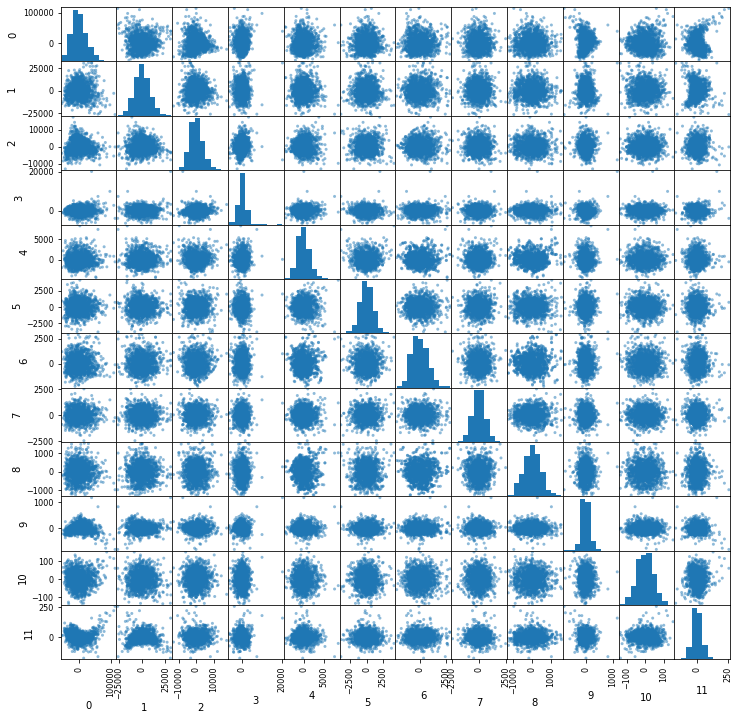

In [4]:
pca = PCA(n_components=12)
pca.fit(data)
#print("PCA components:               "+str(pca.components_))
print("\nPCA explained variance ratio: "+str(pca.explained_variance_ratio_))
print("\nPCA singular values:          "+str(pca.singular_values_))

X = pd.DataFrame(pca.transform(data))
pd.plotting.scatter_matrix(X,figsize=(12,12));

#### PCA with data standardization


PCA explained variance ratio: [8.67630076e-01 1.01407735e-01 1.95669325e-02 4.99783973e-03
 3.15963303e-03 1.48517742e-03 9.23826750e-04 4.94641049e-04
 2.96125768e-04 3.27583829e-05 2.77885691e-06 2.47570954e-06]

PCA singular values:          [937142.1768778  320386.14434339 140734.17063465  71126.15758824
  56553.11189101  38772.81689976  30579.71627688  22376.04168278
  17313.15770017   5758.36795488   1677.14757112   1583.0259366 ]


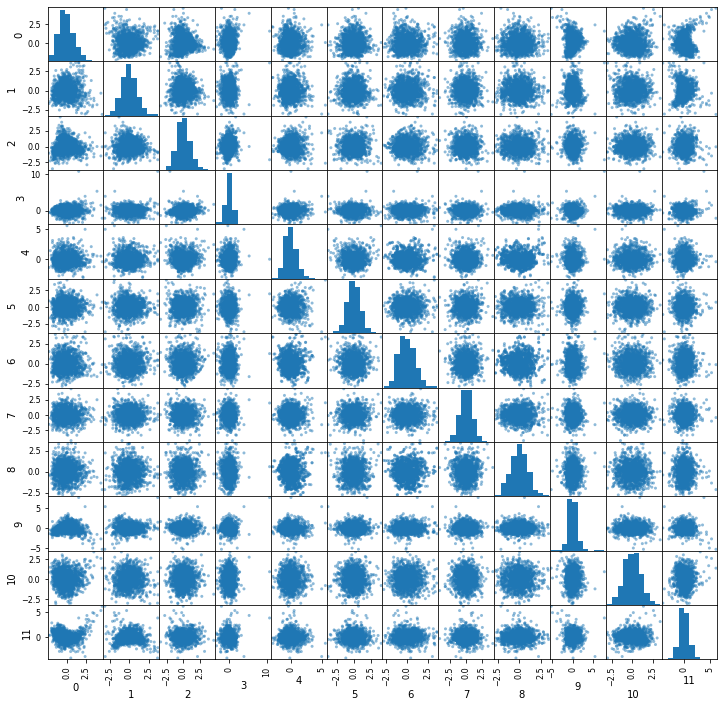

In [5]:
pca = PCA(n_components=12)
pca.fit(X)
#print("PCA components:               "+str(pca.components_))
print("\nPCA explained variance ratio: "+str(pca.explained_variance_ratio_))
print("\nPCA singular values:          "+str(pca.singular_values_))

ssc = SSc()
X = pd.DataFrame(ssc.fit_transform(X))

X = pd.DataFrame(pca.transform(X))
pd.plotting.scatter_matrix(X,figsize=(12,12));

#### PCA analysis of victory/defeat (2 components)

In [6]:
def pcaout(pca, n_ftrs, col_nms):   
    print("Principal components:")
    idx = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6']
    return pd.DataFrame(pca.components_, columns=col_nms, index = idx[:n_ftrs])

PCA explained variance ratio:  [0.25647711 0.12592736]
Portion of variance explained: [0.67069589 0.32930411]


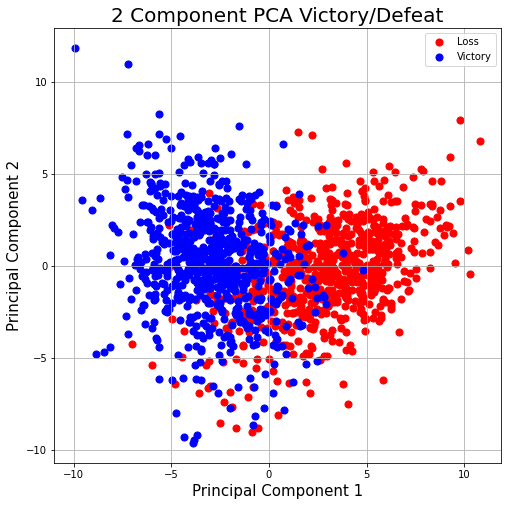

In [7]:
X = data.iloc[:,data.columns != 'result']
Xcol = X.columns
Y = data.iloc[:,data.columns == 'result']
#transform input data (normalize)
ssc = SSc()
Xft = ssc.fit_transform(X)
X = pd.DataFrame(Xft)

pca = PCA(n_components=2)
components = pca.fit_transform(X)
componentDf = pd.DataFrame(data=components, columns=['principal component 1', 'principal component 2'])

pltDF = pd.concat([componentDf, Y], axis = 1)
print("PCA explained variance ratio:  {}".format(pca.explained_variance_ratio_))
print("Portion of variance explained: {}".format(pca.explained_variance_ratio_/sum(pca.explained_variance_ratio_)))


#plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA Victory/Defeat', fontsize = 20)


results = [0.0, 1.0]
colors = ['r', 'b']
for result, color in zip(results,colors):
    indicesToKeep = (pltDF['result'] == result)
    ax.scatter(pltDF.loc[indicesToKeep, 'principal component 1']
               , pltDF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Loss','Victory'])
ax.grid()

In [8]:
df = pcaout(pca, 2, Xcol)
df

Principal components:


,league_CBLoL,league_LCK,league_LCS,league_LEC,league_LMS,gamelength,k,d,a,fb,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,wards,wpm,wardkills,wcpm,totalgold,earnedgpm,goldspent,gspd,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
PC-1,0.003958,-0.008343,0.000866,0.005484,0.000509,-0.050080,-0.166795,0.139952,-0.158998,-0.086159,-0.156447,0.161371,0.003948,-0.115469,0.003115,-0.202534,0.167631,-0.202371,0.177836,-0.108573,-0.092821,-0.085696,-0.097351,-0.047086,-0.008447,-0.074291,0.000345,-0.143544,-0.006874,-0.170376,-0.187454,-0.156228,0.121386,-0.110854,-0.123607,-0.056646,-0.047123,-0.082411,-0.089111,-0.147279,-0.217007,-0.116267,-0.218768,-0.054776,-0.170127,-0.111433,-0.146216,0.145150,-0.185977,-0.173139,0.177246,-0.215511,-0.118877,0.107176,-0.175705,-0.093568,0.073709,-0.144339,-0.105367,0.079592,-0.16317
PC-2,0.046822,-0.115762,0.012782,0.101831,-0.012185,-0.298563,0.064694,0.004309,0.031856,0.033971,0.155790,0.089599,0.196758,0.035238,0.022261,-0.063025,-0.151020,-0.030192,-0.121844,-0.004087,-0.023803,-0.007486,-0.021806,-0.164998,-0.168354,0.026337,0.003719,0.046607,-0.084438,0.044149,0.047430,-0.067670,-0.115831,-0.141347,0.021892,-0.304310,-0.206338,-0.290090,-0.216231,-0.233344,0.048704,-0.254233,0.046821,-0.287850,-0.016775,-0.083955,0.092978,-0.013079,0.067696,0.125517,0.018078,0.066082,-0.058053,-0.136850,0.061247,-0.124232,-0.185095,0.052517,-0.140902,-0.197828,0.05022


#### PCA analysis of victory/defeat (3 components)

PCA explained variance ratio:  [0.25647711 0.12592736 0.08840393]
Portion of variance explained: [0.54475899 0.26747051 0.1877705 ]


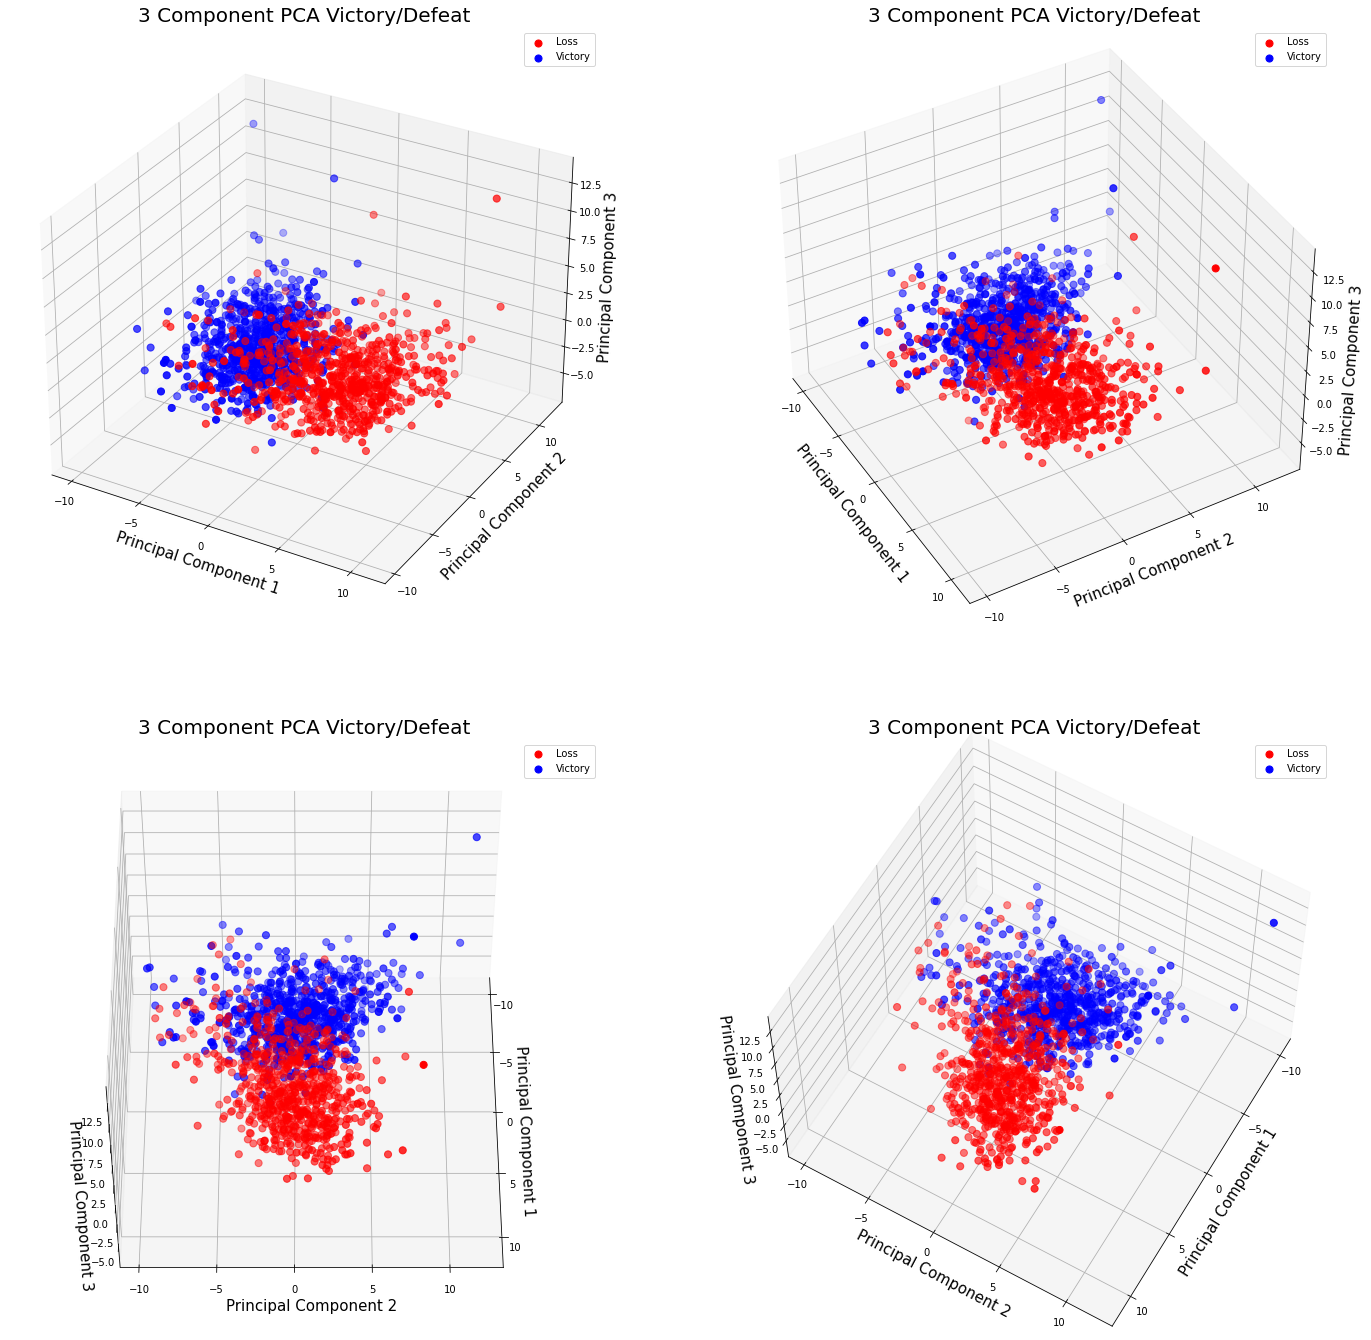

In [22]:
X = data.iloc[:,data.columns != 'result']
Y = data.iloc[:,data.columns == 'result']
#transform input data (normalize)
ssc = SSc()
Xft = ssc.fit_transform(X)
X = pd.DataFrame(Xft)

pca = PCA(n_components=3)
components = pca.fit_transform(X)
componentDf = pd.DataFrame(data=components, columns=['principal component 1', 'principal component 2', 'principal component 3'])

pltDF = pd.concat([componentDf, Y], axis = 1)
print("PCA explained variance ratio:  {}".format(pca.explained_variance_ratio_))
print("Portion of variance explained: {}".format(pca.explained_variance_ratio_/sum(pca.explained_variance_ratio_)))


#plot
fig = plt.figure(figsize = (24,24))

for plot in range(4):
    ax = fig.add_subplot(2,2,plot+1,projection='3d') 
    ax.view_init(30+(10*plot),300+(30*plot))
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 3', fontsize = 15)
    ax.set_title('3 Component PCA Victory/Defeat', fontsize = 20)


    results = [0.0, 1.0]
    colors = ['r', 'b']
    for result, color in zip(results,colors):
        indicesToKeep = (pltDF['result'] == result)
        ax.scatter(pltDF.loc[indicesToKeep, 'principal component 1']
                   , pltDF.loc[indicesToKeep, 'principal component 2']
                   , pltDF.loc[indicesToKeep, 'principal component 3']
                   , c = color
                   , s = 50)
    ax.legend(['Loss','Victory'])
    ax.grid()

#### PCA analysis of victory/defeat (6 components)

PCA explained variance ratio:  [0.25647711 0.12592736 0.08840393 0.05106679 0.03655446 0.03350337]
Portion of variance explained: [0.43328738 0.21273921 0.14934786 0.08627122 0.06175439 0.05659994]


	6-component PCA


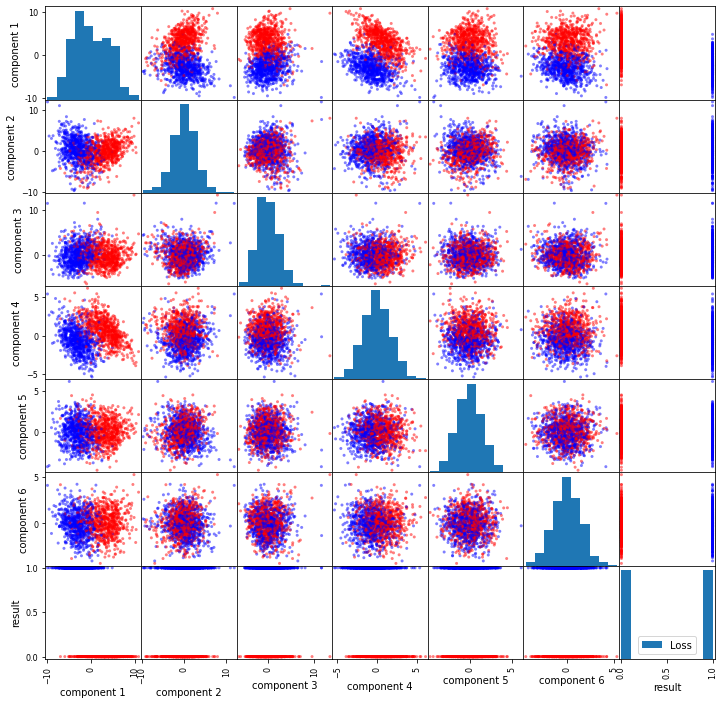

In [10]:
X = data.iloc[:,data.columns != 'result']
Y = data.iloc[:,data.columns == 'result']
#transform input data (normalize)
ssc = SSc()
Xft = ssc.fit_transform(X)
X = pd.DataFrame(Xft)

pca = PCA(n_components=6)
components = pca.fit_transform(X)
componentDf = pd.DataFrame(data=components, columns=['component 1', 'component 2', 'component 3', 
                                                     'component 4', 'component 5', 'component 6'])

pltDF = pd.concat([componentDf, Y], axis = 1)
print("PCA explained variance ratio:  {}".format(pca.explained_variance_ratio_))
print("Portion of variance explained: {}".format(pca.explained_variance_ratio_/sum(pca.explained_variance_ratio_)))

colors = ['r', 'b']
pd.plotting.scatter_matrix(pltDF,figsize=(12,12),c=pltDF.result.apply(lambda x:colors[int(x)]))
print("\n\n\t6-component PCA")
plt.legend(['Loss','Victory'])
plt.show()

#### PCA analysis of region played

PCA of regions
PCA explained variance ratio:  [0.28470343 0.13203852 0.09198295]
Portion of variance explained: [0.55964123 0.25954798 0.18081079]


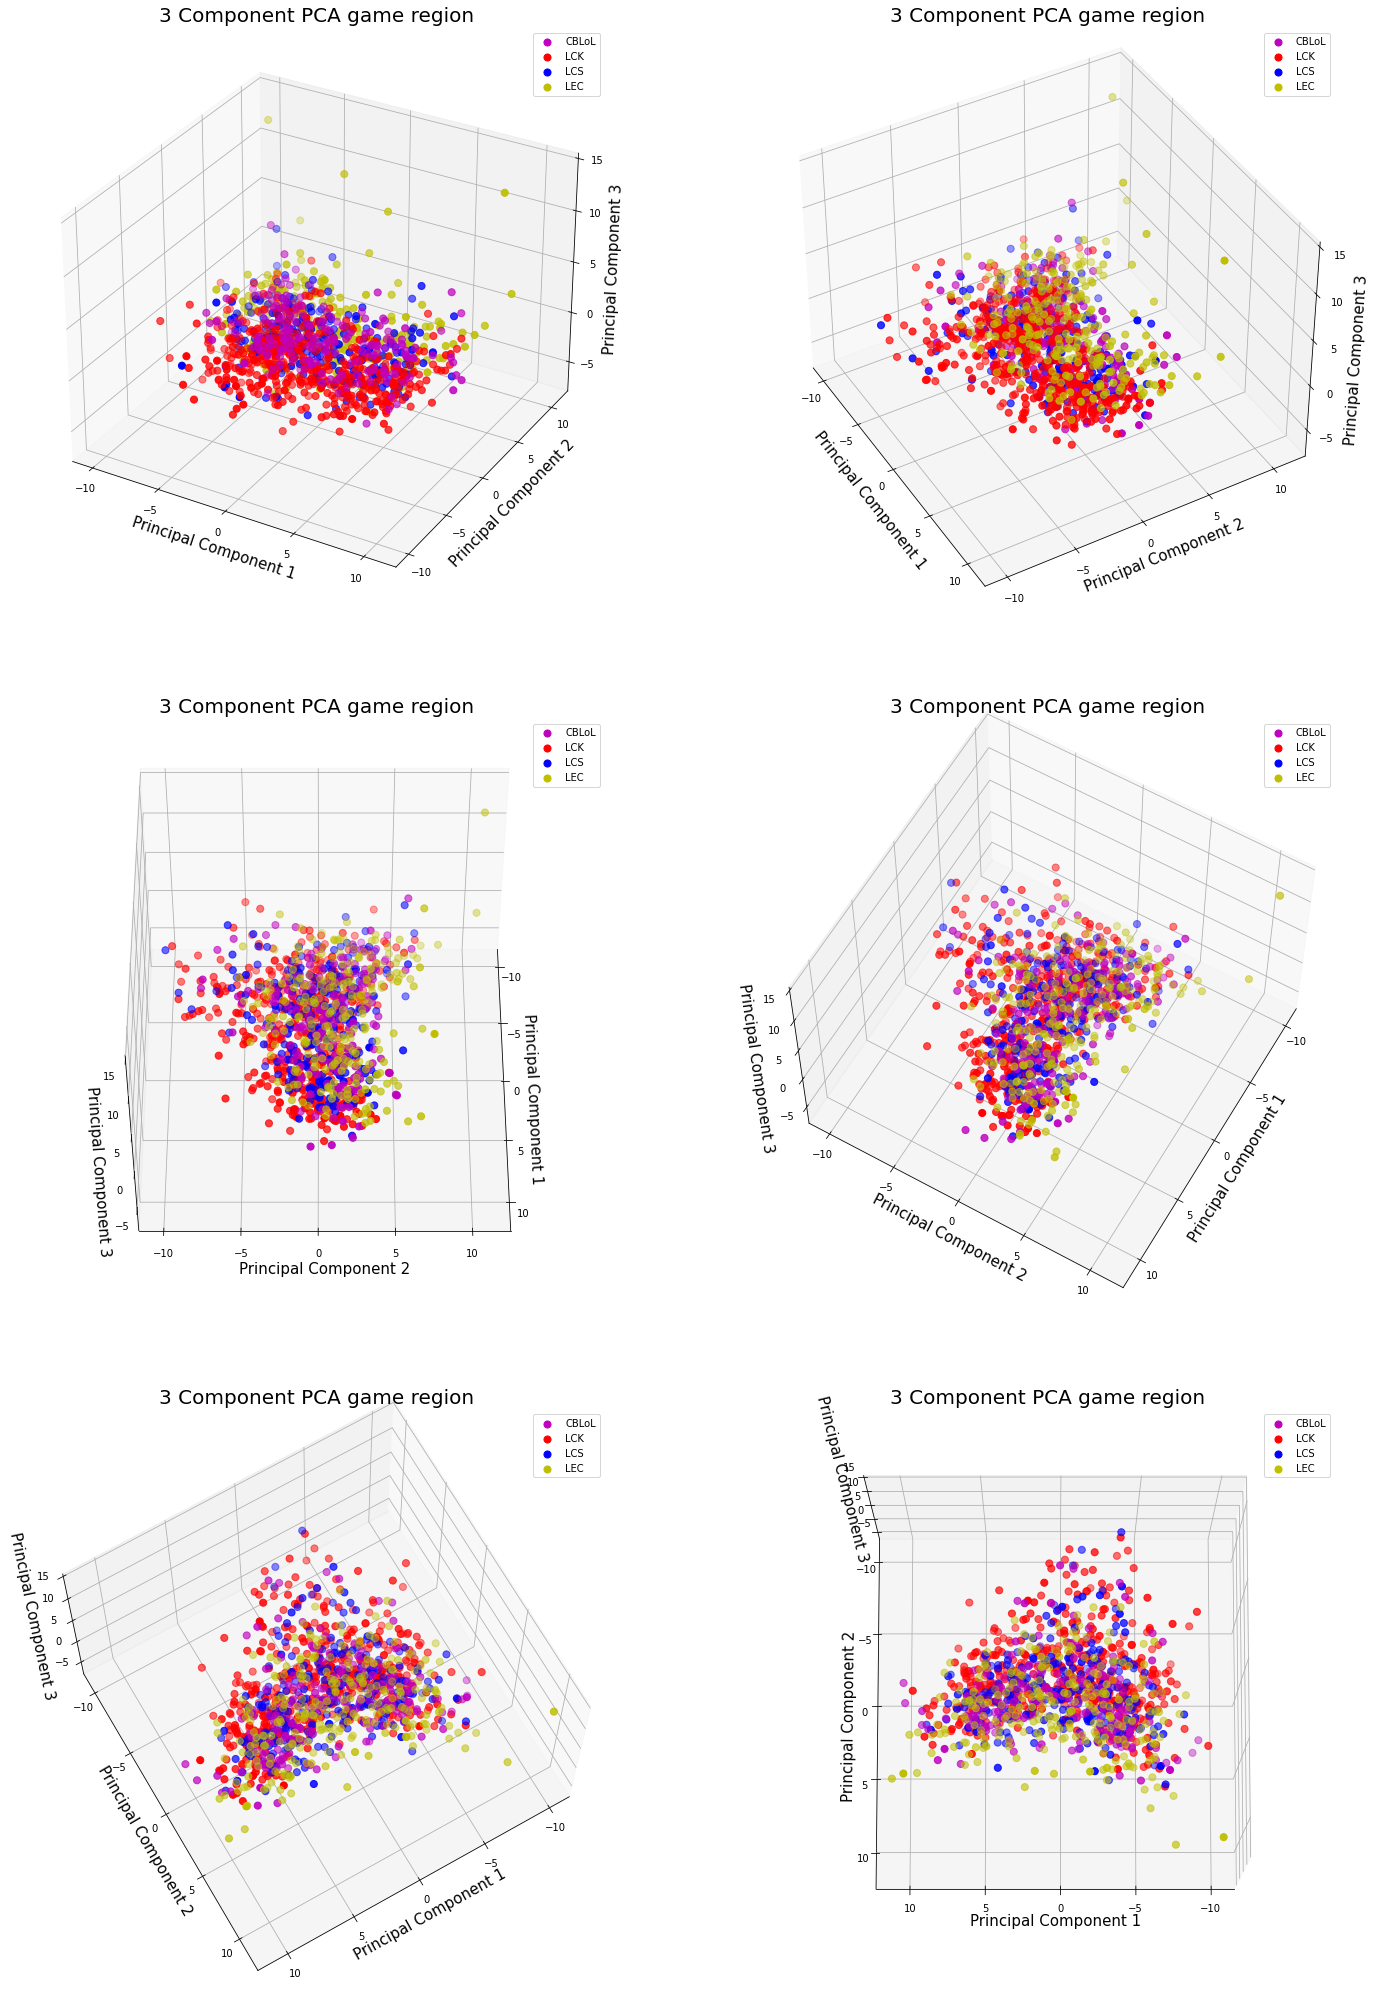

In [16]:
#filein = inpath+year+"\\"+year+'-'+split+"-"+"WrangledNotHot.csv"
#changed for submission version
filein = "Datasets/League_2019/2019-summer-WrangledNotHot.csv"
data2 = pd.read_csv(filein,low_memory=False,index_col=0)

X = data2.iloc[:,1:]
Y = data2.iloc[:,:1]
#transform input data (normalize)
ssc = SSc()
Xft = ssc.fit_transform(X)
X = pd.DataFrame(Xft)

pca = PCA(n_components=3)
components = pca.fit_transform(X)
componentDf = pd.DataFrame(data=components, columns=['principal component 1', 'principal component 2', 'principal component 3'])

pltDF = pd.concat([componentDf, Y], axis = 1)
print("PCA of regions")
print("PCA explained variance ratio:  {}".format(pca.explained_variance_ratio_))
print("Portion of variance explained: {}".format(pca.explained_variance_ratio_/sum(pca.explained_variance_ratio_)))


#plot
fig = plt.figure(figsize = (24,36))

for plot in range(6):
    ax = fig.add_subplot(3,2,plot+1,projection='3d') 
    ax.view_init(30+(10*plot),300+(30*plot))
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 3', fontsize = 15)
    ax.set_title('3 Component PCA game region', fontsize = 20)

    regions = ['CBLoL', 'LCK', 'LCS', 'LEC']
    colors = ['m', 'r', 'b', 'y']
    for region, color in zip(regions,colors):
        indicesToKeep = (pltDF['league'] == region)
        ax.scatter(pltDF.loc[indicesToKeep, 'principal component 1']
                   , pltDF.loc[indicesToKeep, 'principal component 2']
                   , pltDF.loc[indicesToKeep, 'principal component 3']
                   , c = color
                   , s = 50)
    ax.legend(regions)
    ax.grid()